In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [146]:
def mape_score(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test)) * 100
    return mape

In [147]:
def metrics(test, pred):
    d= {}
    mse = mean_squared_error(test, pred)
    rmse = np.sqrt(mse)
    # r_squared = r2_score(test, pred)
    mape= mape_score(test, pred)

    d['MSE'] = mse
    d['RMSE'] = rmse
    # d['R-squared'] = r_squared
    d['MAPE'] = mape
    
    return d

In [148]:
path_2020 = r'C:\Users\himanshu.verma\vs_code\POC_MGC\Dataset\2020.csv'

pd.set_option('display.max_columns', None)
df_2020 = pd.read_csv(path_2020, encoding='windows-1252')
df_2020.head()

,YEAR,QUARTER,QUARTER_ID,CATEGORY,COUNTRY,CLUSTER_NAME,ACTUAL_BUDGET_FLAG,MONTH,MONTH_ID,ENTITY_NAME,SKU_CODE,MANUFACTURING_OR_TRADE,SKU_DESCRIPTION,CLUSTER_CATEGORY,CLUSTER_SUB_CATEGORY,CLUSTER_CHANNEL,CLUSTER_SUB_CHANNEL,CLUSTER_COUNTRY_ID,CLUSTER_COUNTRY,CLUSTER_REGION,CUSTOMER,CURRENCY,PRODUCT,SUB_PRODUCT,BRAND,SUB_BRAND,TEMPERATURE,VOLUME_MT_ACT,VOLUME_CASES_ACT,GROSS_SALES_ACT,NET_REVENUE_ACT,GROSS_PROFIT_ACT,NET_PROFIT_ACT,CUSTOMER_CODE,SKU_CODE_NEW,DATA_SOURCE,INVENTORY_ITEM_ID,SITE_USE_ID
0,2020,Q2,20202.0,Frozen Veg.,Egypt,ICAPP,Actual,May,202005.0,ICAPP,7030900,Manufacturing,F 0/Z 100 ???????? ????? ???? 400 ?? 8 ??? ???...,Undefined,Frozen Vegetables,Retail,Grocery/Retail,NaN,Egypt,0.000000,????? ??????? - ????,USD,Okra,Okra Zero,Americana,Undefined,Undefined,0.003998,0.5000,10.697557,9.436286,3.124132,1.007537,Undefined,4037030900,MAPPING_TABLE,629706.0,NaN
1,2020,Q3,20203.0,Kwt Agencies,Kuwait,Kwt Agencies,Actual,Jul,202007.0,Kwt Agencies,5305332230,Trade,C.G.MUSHROOMS PIECES 24*425 G,Undefined,C&W,Retail,Modern Trade,NaN,Kuwait,0.000000,Undefined,USD,MUSHROOM,Mushroom Pcs Stems,CG,Americana,Undefined,8.491395,832.4897,28496.658978,27955.128114,7271.186706,3888.170916,Undefined,5006410702,MAPPING_TABLE,368138.0,NaN
2,2020,Q1,20201.0,Frozen Veg.,Egypt,ICAPP,Actual,Jan,202001.0,ICAPP,7020883,Manufacturing,???????? ??????? 400 ?? ???? 8 ??? ???????? ??...,Undefined,Frozen Vegetables,Retail,Grocery/Retail,NaN,Egypt,0.000000,?????? - ??????,USD,Beans,Beans Cuts,Americana,Undefined,Undefined,0.003997,0.5000,4.885973,4.297924,1.216026,0.161784,Undefined,4037020829,MAPPING_TABLE,770266.0,NaN
3,2020,Q2,20202.0,Kwt Agencies,Kuwait,Kwt Agencies,Actual,May,202005.0,Kwt Agencies,5302120205,Trade,Pound Cake family Pack 270G2*6,Undefined,Cake,Retail,Modern Trade,NaN,Kuwait,0.000000,Undefined,USD,Cake,Cake,Cake,Americana,Undefined,8.217175,2536.1652,38914.951728,36226.189463,9276.323602,5192.947589,Undefined,5040321110,MAPPING_TABLE,355391.0,NaN
4,2020,Q4,20204.0,Protein,KSA,Meat,Actual,Dec,202012.0,National Food Company,370226,Manufacturing,CHICKEN NUGGET 24*270,Undefined,Chicken,Wholesale,Wholesale,NaN,KSA,-2236.511471,Undefined,USD,Processed Meat,Chicken Nuggets,AMERICANA,Undefined,Undefined,6.310980,973.9167,45515.665604,43279.154133,28634.034761,18463.595643,Undefined,4001370226,MAPPING_TABLE,338939.0,NaN


In [149]:
df_2020.columns

Index(['YEAR', 'QUARTER', 'QUARTER_ID', 'CATEGORY', 'COUNTRY', 'CLUSTER_NAME',
       'ACTUAL_BUDGET_FLAG', 'MONTH', 'MONTH_ID', 'ENTITY_NAME', 'SKU_CODE',
       'MANUFACTURING_OR_TRADE', 'SKU_DESCRIPTION', 'CLUSTER_CATEGORY',
       'CLUSTER_SUB_CATEGORY', 'CLUSTER_CHANNEL', 'CLUSTER_SUB_CHANNEL',
       'CLUSTER_COUNTRY_ID', 'CLUSTER_COUNTRY', 'CLUSTER_REGION', 'CUSTOMER',
       'CURRENCY', 'PRODUCT', 'SUB_PRODUCT', 'BRAND', 'SUB_BRAND',
       'TEMPERATURE', 'VOLUME_MT_ACT', 'VOLUME_CASES_ACT', 'GROSS_SALES_ACT',
       'NET_REVENUE_ACT', 'GROSS_PROFIT_ACT', 'NET_PROFIT_ACT',
       'CUSTOMER_CODE', 'SKU_CODE_NEW', 'DATA_SOURCE', 'INVENTORY_ITEM_ID',
       'SITE_USE_ID'],
      dtype='object')

In [150]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119593 entries, 0 to 119592
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   YEAR                    119593 non-null  int64  
 1   QUARTER                 119593 non-null  object 
 2   QUARTER_ID              119592 non-null  float64
 3   CATEGORY                119592 non-null  object 
 4   COUNTRY                 119592 non-null  object 
 5   CLUSTER_NAME            119592 non-null  object 
 6   ACTUAL_BUDGET_FLAG      119592 non-null  object 
 7   MONTH                   119592 non-null  object 
 8   MONTH_ID                119592 non-null  float64
 9   ENTITY_NAME             119592 non-null  object 
 10  SKU_CODE                119592 non-null  object 
 11  MANUFACTURING_OR_TRADE  119592 non-null  object 
 12  SKU_DESCRIPTION         119592 non-null  object 
 13  CLUSTER_CATEGORY        119592 non-null  object 
 14  CLUSTER_SUB_CATEGORY

In [151]:
df_2020.isnull().sum() / len(df_2020) * 100

YEAR                        0.000000
QUARTER                     0.000000
QUARTER_ID                  0.000836
CATEGORY                    0.000836
COUNTRY                     0.000836
CLUSTER_NAME                0.000836
ACTUAL_BUDGET_FLAG          0.000836
MONTH                       0.000836
MONTH_ID                    0.000836
ENTITY_NAME                 0.000836
SKU_CODE                    0.000836
MANUFACTURING_OR_TRADE      0.000836
SKU_DESCRIPTION             0.000836
CLUSTER_CATEGORY            0.000836
CLUSTER_SUB_CATEGORY        0.000836
CLUSTER_CHANNEL             0.000836
CLUSTER_SUB_CHANNEL         0.000836
CLUSTER_COUNTRY_ID        100.000000
CLUSTER_COUNTRY             0.000836
CLUSTER_REGION              0.000836
CUSTOMER                    0.000836
CURRENCY                    0.000836
PRODUCT                     0.000836
SUB_PRODUCT                 0.000836
BRAND                       0.000836
SUB_BRAND                   0.000836
TEMPERATURE                 0.021740
V

In [152]:
df_2020 = df_2020[['YEAR', 'MONTH','QUARTER', 'SKU_CODE_NEW', 'COUNTRY' ,'CATEGORY', 'CLUSTER_NAME', 'CLUSTER_CHANNEL', 
                   'CLUSTER_SUB_CHANNEL', 'VOLUME_MT_ACT', 'NET_REVENUE_ACT', 'GROSS_PROFIT_ACT']]

df_2020.head()

,YEAR,MONTH,QUARTER,SKU_CODE_NEW,COUNTRY,CATEGORY,CLUSTER_NAME,CLUSTER_CHANNEL,CLUSTER_SUB_CHANNEL,VOLUME_MT_ACT,NET_REVENUE_ACT,GROSS_PROFIT_ACT
0,2020,May,Q2,4037030900,Egypt,Frozen Veg.,ICAPP,Retail,Grocery/Retail,0.003998,9.436286,3.124132
1,2020,Jul,Q3,5006410702,Kuwait,Kwt Agencies,Kwt Agencies,Retail,Modern Trade,8.491395,27955.128114,7271.186706
2,2020,Jan,Q1,4037020829,Egypt,Frozen Veg.,ICAPP,Retail,Grocery/Retail,0.003997,4.297924,1.216026
3,2020,May,Q2,5040321110,Kuwait,Kwt Agencies,Kwt Agencies,Retail,Modern Trade,8.217175,36226.189463,9276.323602
4,2020,Dec,Q4,4001370226,KSA,Protein,Meat,Wholesale,Wholesale,6.310980,43279.154133,28634.034761


In [153]:
df_2020.shape

(119593, 12)

In [154]:
df_2020['SKU_CODE_NEW'].value_counts(ascending= False)

SKU_CODE_NEW
4037050883                        11535
4037030903                         5423
4037040883                         5184
4037030900                         4802
4037010883                         3260
4037120882                         2432
4037030906                         2334
4037020829                         2294
4037030859                         2104
4037270882                         1827
4037110883                         1479
4037230883                         1107
4037060882                         1095
4037130882                          728
4037140880                          665
4037260883                          543
4037080880                          538
4036010882                          460
4037022080                          403
4037122080                          351
4037012080                          323
4037050882                          291
4037070882                          283
4037121680                          281
4037240880                 

In [155]:
df_2020['CLUSTER_NAME'].value_counts()

CLUSTER_NAME
ICAPP           54083
Meat            26655
Kwt Agencies    11507
GFI              9752
KSA Cake         7108
Snacks           5588
Kwt Bakeries     2751
FF               2075
HO                 25
CPG                12
Cold Stores        12
Karawin            12
Flex               12
Name: count, dtype: int64

In [156]:
df_2020['CATEGORY'].value_counts()

CATEGORY
Frozen Veg.        56158
Protein            24070
Kwt Agencies       11507
C&W                 9752
Cake                7108
Snacks              5588
Bakeries            2751
Frozen Veg-Meat     2585
Out of Scope          61
CPG                   12
Name: count, dtype: int64

In [157]:
df_2020_meat = df_2020[df_2020['CLUSTER_NAME'] == 'Meat']
df_2020_meat.head()

,YEAR,MONTH,QUARTER,SKU_CODE_NEW,COUNTRY,CATEGORY,CLUSTER_NAME,CLUSTER_CHANNEL,CLUSTER_SUB_CHANNEL,VOLUME_MT_ACT,NET_REVENUE_ACT,GROSS_PROFIT_ACT
4,2020,Dec,Q4,4001370226,KSA,Protein,Meat,Wholesale,Wholesale,6.310980,43279.154133,28634.034761
10,2020,May,Q2,NaN,UAE,Protein,Meat,Food Services,HORECA,0.019140,81.521739,35.264958
18,2020,Jul,Q3,NaN,KSA,Protein,Meat,Retail,Modern Trade,0.007388,0.000000,-13.362774
21,2020,Dec,Q4,NaN,Kuwait,Protein,Meat,Retail,Modern Trade,0.760391,5111.552981,3658.691018
22,2020,Mar,Q1,4001370273,KSA,Protein,Meat,Food Services,HORECA,10.751000,49223.040000,17025.241206


In [158]:
df_2020_meat['CATEGORY'].value_counts()

CATEGORY
Protein            24070
Frozen Veg-Meat     2585
Name: count, dtype: int64

In [159]:
df_2020_meat['CLUSTER_NAME'].value_counts()

CLUSTER_NAME
Meat    26655
Name: count, dtype: int64

In [160]:
df_2020_meat['SKU_CODE_NEW'].value_counts()

SKU_CODE_NEW
4001320201      98
4001350114      94
4001370852      92
4001370806      91
4001330103      84
4040451001      84
4001320101      84
4001340501      83
4001370144      83
4001370290      82
4001360308      82
4001971964      81
4001361602      79
4001360106      77
4001370707      76
4001360102      76
4001371514      74
5012950137      72
4001310174      72
4001370123      72
5011390102      71
4001371108      70
4001972035      69
4001371537      68
4001350207      66
4001370306      66
4001310624      66
4001370124      66
4001370181      65
4001362302      65
4001310613      65
4001951025      64
4001310402      64
4001370145      64
4001370226      64
4001310505      63
4003350128      62
4001470128      62
4001310140      61
5011540252      60
4001370505      60
4001972087      59
4001370283      59
4001370231      59
4040471505      58
4001951016      58
4001410212      57
4001350115      57
4001310123      57
4001340301      57
4001370325      57
4001310701      57

In [161]:
df_2020_meat_4001320201 = df_2020_meat[df_2020_meat['SKU_CODE_NEW'] == '4001320201']
df_2020_meat_4001320201

,YEAR,MONTH,QUARTER,SKU_CODE_NEW,COUNTRY,CATEGORY,CLUSTER_NAME,CLUSTER_CHANNEL,CLUSTER_SUB_CHANNEL,VOLUME_MT_ACT,NET_REVENUE_ACT,GROSS_PROFIT_ACT
1391,2020,Sep,Q3,4001320201,UAE,Protein,Meat,Intl sales,Exports,1.84800,3.264715e+03,1762.986318
2665,2020,Jul,Q3,4001320201,Oman,Protein,Meat,Intl sales,Exports,4.00000,5.645649e+03,2473.292349
3015,2020,Dec,Q4,4001320201,KSA,Protein,Meat,Retail,Grocery/Retail,0.00800,1.092355e+01,4.540714
6552,2020,Aug,Q3,4001320201,KSA,Protein,Meat,Food Services,HORECA,1.53880,2.101813e+03,901.931866
7177,2020,Sep,Q3,4001320201,Bahrain,Protein,Meat,Intl sales,Exports,0.96000,1.543969e+03,763.849734
7713,2020,Jan,Q1,4001320201,KSA,Protein,Meat,Retail,Grocery/Retail,20.67800,2.935440e+04,12793.817827
10999,2020,Jul,Q3,4001320201,KSA,Protein,Meat,Wholesale,Wholesale,105.92920,1.314053e+05,47393.981859
12542,2020,Dec,Q4,4001320201,KSA,Protein,Meat,Retail,Grocery/Retail,15.67000,2.225236e+04,9749.969838
13363,2020,Oct,Q4,4001320201,Oman,Protein,Meat,Intl sales,Exports,2.40000,3.214718e+03,1309.151802
13654,2020,Nov,Q4,4001320201,KSA,Protein,Meat,Food Services,HORECA,2.15200,2.859093e+03,1125.877765


In [162]:
df_2020_meat_4001320201['CATEGORY'].value_counts()

CATEGORY
Protein    98
Name: count, dtype: int64

## Grouping the data

In [163]:
df_2020['COUNTRY'].value_counts()

COUNTRY
Egypt           59790
Kuwait          22988
KSA             18007
UAE              6384
Oman             2390
Bahrain          2143
Qatar            1237
Jordan           1154
USA              1040
Iraq              855
Palestine         713
Libya             458
Canada            415
Yemen             390
UK                281
Lebanon           254
Australia         159
Sudan              98
France             92
Tunisia            60
Netherlands        58
Morocco            48
Congo              48
Germany            48
Mauritius          45
Somalia            39
Out of Scope       37
Pakistan           34
Singapore          33
Ireland            26
Italy              22
Kenya              19
Japan              18
Djibouti           18
Ghana              18
Belgium            15
Spain              15
Ivory Coast        14
Switzerland        10
Malaysia           10
Uganda              9
Maldives            9
Norway              9
Madagascar          8
Tanzania            8
S.

In [164]:
pd.set_option('display.max_rows', None)
df_2020_grouped = df_2020.groupby(['YEAR','MONTH','COUNTRY', 'CLUSTER_NAME'])['NET_REVENUE_ACT'].sum()
df_2020_grouped

YEAR  MONTH  COUNTRY       CLUSTER_NAME
2020  Apr    Australia     GFI             1.670788e+05
             Bahrain       FF              2.064350e+04
                           GFI             5.005948e+05
                           KSA Cake        2.207623e+04
                           Meat            6.383677e+05
             Belgium       ICAPP           3.582574e+05
             Canada        ICAPP           5.333178e+05
             Egypt         CPG             2.119480e+07
                           Cold Stores     3.158079e+05
                           FF              1.611512e+06
                           GFI             2.501861e+06
                           ICAPP           6.817424e+05
                           KSA Cake        1.857955e+04
                           Karawin         4.874467e+04
                           Meat            4.473703e+05
                           Snacks          1.255619e+07
             Germany       GFI             0.000000e+00
        

## Taking one 'country' and 'cluster name'

In [165]:
df_2020_egypt_protein = df_2020[(df_2020['COUNTRY'] == 'Egypt') & (df_2020['CLUSTER_NAME'] == 'Meat')]
df_2020_egypt_protein.head()

,YEAR,MONTH,QUARTER,SKU_CODE_NEW,COUNTRY,CATEGORY,CLUSTER_NAME,CLUSTER_CHANNEL,CLUSTER_SUB_CHANNEL,VOLUME_MT_ACT,NET_REVENUE_ACT,GROSS_PROFIT_ACT
7076,2020,Sep,Q3,Beefy,Egypt,Protein,Meat,Retail,Grocery/Retail,223.688647,531648.771116,168576.044075
16727,2020,Dec,Q4,Beefy,Egypt,Protein,Meat,Retail,Grocery/Retail,171.908500,372791.012080,123438.285702
18900,2020,Jun,Q2,Beefy,Egypt,Protein,Meat,Retail,Grocery/Retail,222.121380,534698.548881,107753.213138
30155,2020,Jul,Q3,Beefy,Egypt,Protein,Meat,Retail,Grocery/Retail,236.263650,553241.655653,162880.292027
38869,2020,Oct,Q4,Beefy,Egypt,Protein,Meat,Retail,Grocery/Retail,171.883629,395292.505580,89683.924495


In [166]:
df_2020_egypt_protein.groupby(['MONTH'])['NET_REVENUE_ACT'].sum()

MONTH
Apr    447370.329139
Aug    496571.475263
Dec    372791.012080
Feb    384678.382496
Jan    388490.946834
Jul    553241.655653
Jun    534698.548881
Mar    411295.252324
May    674286.388990
Nov    446194.888932
Oct    395292.505580
Sep    531648.771116
Name: NET_REVENUE_ACT, dtype: float64

## Proper dataset making function

In [167]:
def data_prep(path, country, cluster_name):
    
    path_2020 = path

    pd.set_option('display.max_columns', None)
    df = pd.read_csv(path, encoding='windows-1252', low_memory= False)
    
    df = df[['YEAR', 'MONTH','QUARTER', 'MONTH_ID','SKU_CODE_NEW', 'COUNTRY' ,'CATEGORY', 'CLUSTER_NAME', 'CLUSTER_CHANNEL', 
                   'CLUSTER_SUB_CHANNEL', 'VOLUME_MT_ACT', 'NET_REVENUE_ACT', 'GROSS_PROFIT_ACT']]
    
    df_year = df[(df['COUNTRY'] == country) & (df['CLUSTER_NAME'] == cluster_name)]
    df_year.groupby(['MONTH'])[['NET_REVENUE_ACT', 'GROSS_PROFIT_ACT']].sum()
    df_year = df_year[['YEAR', 'MONTH','MONTH_ID', 'COUNTRY', 'CLUSTER_NAME', 'NET_REVENUE_ACT', 'GROSS_PROFIT_ACT']]
    
    df_year['month'] = df_year['MONTH_ID'].astype('str').str[-4:6]
    df_year['month'] = df_year['month'].astype('int')
    
    df_year['DATE'] = pd.to_datetime(df_year[['YEAR', 'month']].assign(day=1))
    df_year['DATE'] = df_year['DATE'] + pd.offsets.MonthEnd()
    df_year.set_index(['DATE'], inplace= True)
    return df_year

In [168]:
# YEAR 2020

df_2020 = data_prep(r'C:\Users\himanshu.verma\vs_code\POC_MGC\Dataset\2020.csv', 'Egypt', 'Meat')
df_2020

,YEAR,MONTH,MONTH_ID,COUNTRY,CLUSTER_NAME,NET_REVENUE_ACT,GROSS_PROFIT_ACT,month
DATE,,,,,,,,
2020-09-30,2020,Sep,202009.0,Egypt,Meat,531648.771116,168576.044075,9
2020-12-31,2020,Dec,202012.0,Egypt,Meat,372791.012080,123438.285702,12
2020-06-30,2020,Jun,202006.0,Egypt,Meat,534698.548881,107753.213138,6
2020-07-31,2020,Jul,202007.0,Egypt,Meat,553241.655653,162880.292027,7
2020-10-31,2020,Oct,202010.0,Egypt,Meat,395292.505580,89683.924495,10
2020-04-30,2020,Apr,202004.0,Egypt,Meat,447370.329139,131383.669551,4
2020-05-31,2020,May,202005.0,Egypt,Meat,674286.388990,166532.414825,5
2020-08-31,2020,Aug,202008.0,Egypt,Meat,496571.475263,143148.731489,8
2020-01-31,2020,Jan,202001.0,Egypt,Meat,388490.946834,109303.409368,1


In [169]:
# YEAR 2021

df_2021 = data_prep(r'C:\Users\himanshu.verma\vs_code\POC_MGC\Dataset\2021.csv', 'Egypt', 'Meat')
df_2021


,YEAR,MONTH,MONTH_ID,COUNTRY,CLUSTER_NAME,NET_REVENUE_ACT,GROSS_PROFIT_ACT,month
DATE,,,,,,,,
2021-04-30,2021,Apr,202104.0,Egypt,Meat,591515.743841,156848.342745,4
2021-01-31,2021,Jan,202101.0,Egypt,Meat,322546.609085,82553.123409,1
2021-11-30,2021,Nov,202111.0,Egypt,Meat,531344.896323,126949.937985,11
2021-10-31,2021,Oct,202110.0,Egypt,Meat,449512.532221,125984.276187,10
2021-09-30,2021,Sep,202109.0,Egypt,Meat,507705.430927,146354.684503,9
2021-06-30,2021,Jun,202106.0,Egypt,Meat,380405.565908,116064.331867,6
2021-02-28,2021,Feb,202102.0,Egypt,Meat,337341.856846,96537.839956,2
2021-05-31,2021,May,202105.0,Egypt,Meat,435408.999724,93364.205725,5
2021-03-31,2021,Mar,202103.0,Egypt,Meat,386895.926362,103175.381942,3


In [170]:
# YEAR 2022

df_2022 = data_prep(r'C:\Users\himanshu.verma\vs_code\POC_MGC\Dataset\2022.csv', 'Egypt', 'Meat')
df_2022

,YEAR,MONTH,MONTH_ID,COUNTRY,CLUSTER_NAME,NET_REVENUE_ACT,GROSS_PROFIT_ACT,month
DATE,,,,,,,,
2022-10-31,2022,Oct,202210.0,Egypt,Meat,425290.618623,110474.504456,10
2022-08-31,2022,Aug,202208.0,Egypt,Meat,381302.807911,112756.938200,8
2022-12-31,2022,Dec,202212.0,Egypt,Meat,550732.550717,165163.188580,12
2022-09-30,2022,Sep,202209.0,Egypt,Meat,359995.627219,109089.212930,9
2022-06-30,2022,Jun,202206.0,Egypt,Meat,233672.854065,60016.690295,6
2022-07-31,2022,Jul,202207.0,Egypt,Meat,52757.000000,3033.385093,7
2022-03-31,2022,Mar,202203.0,Egypt,Meat,411921.746753,112854.209924,3
2022-05-31,2022,May,202205.0,Egypt,Meat,146334.742436,46017.505849,5
2022-11-30,2022,Nov,202211.0,Egypt,Meat,316597.692112,50850.692112,11


In [171]:
# YEAR 2023

df_2023 = data_prep(r'C:\Users\himanshu.verma\vs_code\POC_MGC\Dataset\2023.csv', 'Egypt', 'Meat')
df_2023

,YEAR,MONTH,MONTH_ID,COUNTRY,CLUSTER_NAME,NET_REVENUE_ACT,GROSS_PROFIT_ACT,month
DATE,,,,,,,,
2023-02-28,2023,Feb,202302.0,Egypt,Meat,259569.8701,39760.87478,2
2023-01-31,2023,Jan,202301.0,Egypt,Meat,164316.8482,48477.75765,1
2023-03-31,2023,Mar,202303.0,Egypt,Meat,318053.6056,80033.64800,3


## Training and test dataset

In [280]:
data_full = pd.concat([df_2020, df_2021, df_2022, df_2023], axis= 0)
data_full = data_full.sort_index()
data_full

,YEAR,MONTH,MONTH_ID,COUNTRY,CLUSTER_NAME,NET_REVENUE_ACT,GROSS_PROFIT_ACT,month
DATE,,,,,,,,
2020-01-31,2020,Jan,202001.0,Egypt,Meat,388490.946834,109303.409368,1
2020-02-29,2020,Feb,202002.0,Egypt,Meat,384678.382496,118826.555895,2
2020-03-31,2020,Mar,202003.0,Egypt,Meat,411295.252324,107653.049743,3
2020-04-30,2020,Apr,202004.0,Egypt,Meat,447370.329139,131383.669551,4
2020-05-31,2020,May,202005.0,Egypt,Meat,674286.388990,166532.414825,5
2020-06-30,2020,Jun,202006.0,Egypt,Meat,534698.548881,107753.213138,6
2020-07-31,2020,Jul,202007.0,Egypt,Meat,553241.655653,162880.292027,7
2020-08-31,2020,Aug,202008.0,Egypt,Meat,496571.475263,143148.731489,8
2020-09-30,2020,Sep,202009.0,Egypt,Meat,531648.771116,168576.044075,9


In [281]:
train_data = data_full[:-6]
train_data

,YEAR,MONTH,MONTH_ID,COUNTRY,CLUSTER_NAME,NET_REVENUE_ACT,GROSS_PROFIT_ACT,month
DATE,,,,,,,,
2020-01-31,2020,Jan,202001.0,Egypt,Meat,388490.946834,109303.409368,1
2020-02-29,2020,Feb,202002.0,Egypt,Meat,384678.382496,118826.555895,2
2020-03-31,2020,Mar,202003.0,Egypt,Meat,411295.252324,107653.049743,3
2020-04-30,2020,Apr,202004.0,Egypt,Meat,447370.329139,131383.669551,4
2020-05-31,2020,May,202005.0,Egypt,Meat,674286.388990,166532.414825,5
2020-06-30,2020,Jun,202006.0,Egypt,Meat,534698.548881,107753.213138,6
2020-07-31,2020,Jul,202007.0,Egypt,Meat,553241.655653,162880.292027,7
2020-08-31,2020,Aug,202008.0,Egypt,Meat,496571.475263,143148.731489,8
2020-09-30,2020,Sep,202009.0,Egypt,Meat,531648.771116,168576.044075,9


In [282]:
test_data = data_full[-6:]
test_data

,YEAR,MONTH,MONTH_ID,COUNTRY,CLUSTER_NAME,NET_REVENUE_ACT,GROSS_PROFIT_ACT,month
DATE,,,,,,,,
2022-10-31,2022,Oct,202210.0,Egypt,Meat,425290.618623,110474.504456,10
2022-11-30,2022,Nov,202211.0,Egypt,Meat,316597.692112,50850.692112,11
2022-12-31,2022,Dec,202212.0,Egypt,Meat,550732.550717,165163.188580,12
2023-01-31,2023,Jan,202301.0,Egypt,Meat,164316.848200,48477.757650,1
2023-02-28,2023,Feb,202302.0,Egypt,Meat,259569.870100,39760.874780,2
2023-03-31,2023,Mar,202303.0,Egypt,Meat,318053.605600,80033.648000,3


In [283]:
# val_data = df_2023.sort_index()
# val_data

,YEAR,MONTH,MONTH_ID,COUNTRY,CLUSTER_NAME,NET_REVENUE_ACT,GROSS_PROFIT_ACT,month
DATE,,,,,,,,
2023-01-31,2023,Jan,202301.0,Egypt,Meat,164316.8482,48477.75765,1
2023-02-28,2023,Feb,202302.0,Egypt,Meat,259569.8701,39760.87478,2
2023-03-31,2023,Mar,202303.0,Egypt,Meat,318053.6056,80033.64800,3


In [285]:
train_data['GROSS_PROFIT_ACT'], len(train_data['GROSS_PROFIT_ACT'])

(DATE
 2020-01-31    109303.409368
 2020-02-29    118826.555895
 2020-03-31    107653.049743
 2020-04-30    131383.669551
 2020-05-31    166532.414825
 2020-06-30    107753.213138
 2020-07-31    162880.292027
 2020-08-31    143148.731489
 2020-09-30    168576.044075
 2020-10-31     89683.924495
 2020-11-30    109664.181550
 2020-12-31    123438.285702
 2021-01-31     82553.123409
 2021-02-28     96537.839956
 2021-03-31    103175.381942
 2021-04-30    156848.342745
 2021-05-31     93364.205725
 2021-06-30    116064.331867
 2021-07-31    132255.290315
 2021-08-31    156037.898654
 2021-09-30    146354.684503
 2021-10-31    125984.276187
 2021-11-30    126949.937985
 2021-12-31     32417.895477
 2022-01-31     72431.015649
 2022-02-28     89546.898870
 2022-03-31    112854.209924
 2022-04-30    152893.068496
 2022-05-31     46017.505849
 2022-06-30     60016.690295
 2022-07-31      3033.385093
 2022-08-31    112756.938200
 2022-09-30    109089.212930
 Name: GROSS_PROFIT_ACT, dtype: float

<Axes: xlabel='DATE'>

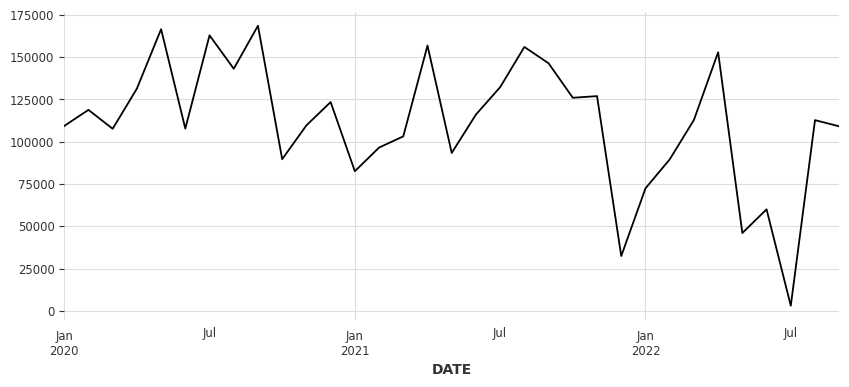

In [286]:
train_data['GROSS_PROFIT_ACT'].plot(figsize= (10,4))

In [287]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


def adf_test(data):

    result = adfuller(data)
    print(result)
    adf_statistic, p_value, used_lag, nobs, critical_values, icbest = result


    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print(f'Lags Used: {used_lag}')
    print(f'Number of Observations: {nobs}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key}: {value}')

    if p_value < 0.05:
        print('The time series is likely stationary.')
    else:
        print('The time series is likely not stationary.')

In [288]:
adf_test(train_data['GROSS_PROFIT_ACT'])

(-1.6611384845567507, 0.4512380485112476, 7, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, 528.2731053237142)
ADF Statistic: -1.6611384845567507
p-value: 0.4512380485112476
Lags Used: 7
Number of Observations: 25
Critical Values:
   1%: -3.7238633119999998
   5%: -2.98648896
   10%: -2.6328004
The time series is likely not stationary.


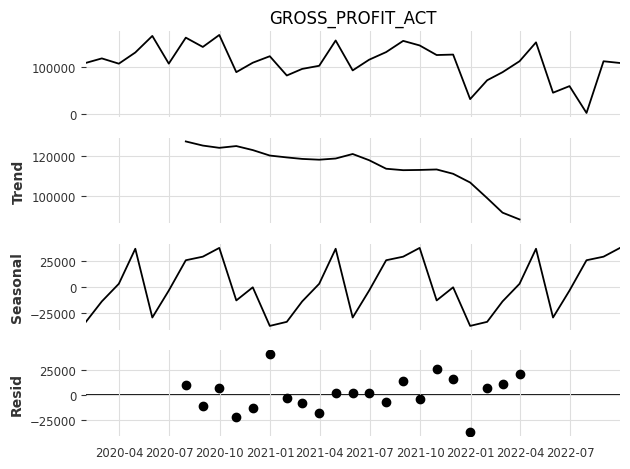

In [289]:
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_decompose(train_data['GROSS_PROFIT_ACT'], model= 'additive').plot();

<Axes: xlabel='DATE'>

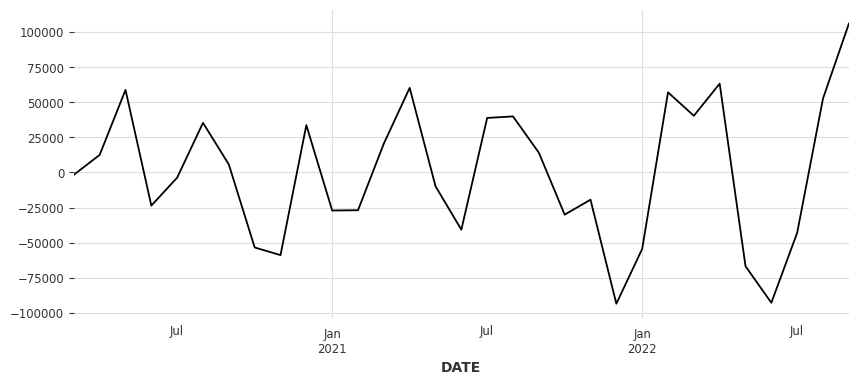

In [290]:
data_diff = train_data['GROSS_PROFIT_ACT']
differenced_data = data_diff.diff(2).dropna()

differenced_data.plot(figsize= (10,4))

In [291]:
differenced_data

DATE
2020-03-31     -1650.359625
2020-04-30     12557.113656
2020-05-31     58879.365082
2020-06-30    -23630.456413
2020-07-31     -3652.122798
2020-08-31     35395.518351
2020-09-30      5695.752048
2020-10-31    -53464.806994
2020-11-30    -58911.862524
2020-12-31     33754.361207
2021-01-31    -27111.058141
2021-02-28    -26900.445745
2021-03-31     20622.258532
2021-04-30     60310.502789
2021-05-31     -9811.176217
2021-06-30    -40784.010878
2021-07-31     38891.084590
2021-08-31     39973.566786
2021-09-30     14099.394188
2021-10-31    -30053.622466
2021-11-30    -19404.746518
2021-12-31    -93566.380711
2022-01-31    -54518.922336
2022-02-28     57129.003393
2022-03-31     40423.194275
2022-04-30     63346.169626
2022-05-31    -66836.704076
2022-06-30    -92876.378202
2022-07-31    -42984.120756
2022-08-31     52740.247905
2022-09-30    106055.827837
Name: GROSS_PROFIT_ACT, dtype: float64

In [292]:
adf_test(differenced_data)

(-4.4590636662690155, 0.0002329866915787289, 9, 21, {'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}, 497.2538963553219)
ADF Statistic: -4.4590636662690155
p-value: 0.0002329866915787289
Lags Used: 9
Number of Observations: 21
Critical Values:
   1%: -3.7883858816542486
   5%: -3.013097747543462
   10%: -2.6463967573696143
The time series is likely stationary.


In [293]:
from pmdarima import auto_arima

# Load your time series data
data = train_data['GROSS_PROFIT_ACT']
print(len(data))
# Perform differencing to make the data stationary (if necessary)
# data_diff = data.diff().dropna()

# Fit an AutoARIMA model to automatically select p, d, and q
model = auto_arima(data, seasonal=True, stepwise=True, suppress_warnings=True, max_order=None)

# Get the best orders
p, d, q = model.order
print(f'Best ARIMA Order: ({p}, {d}, {q})')


33
Best ARIMA Order: (1, 0, 0)


In [294]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(data, order=(p, d, q))
results_arima = model_arima.fit()

# Make forecasts using the fitted ARIMA model
forecast = results_arima.forecast(steps=6)

In [295]:
forecast

2022-10-31    110522.737780
2022-11-30    110930.039010
2022-12-31    111045.763750
2023-01-31    111078.644122
2023-02-28    111087.986280
2023-03-31    111090.640627
Freq: M, Name: predicted_mean, dtype: float64

In [296]:
test_data['GROSS_PROFIT_ACT']

DATE
2022-10-31    110474.504456
2022-11-30     50850.692112
2022-12-31    165163.188580
2023-01-31     48477.757650
2023-02-28     39760.874780
2023-03-31     80033.648000
Name: GROSS_PROFIT_ACT, dtype: float64

In [297]:
metrics(test_data['GROSS_PROFIT_ACT'], forecast)

{'MSE': 2751531755.521727,
 'RMSE': 52455.045091218126,
 'MAPE': 83.04775941238995}

In [189]:
## p,d,q --> (1,1,1)

# {'MSE': 15926255582.989616,
#  'RMSE': 126199.26934411949,
#  'R-squared': -1.0402524384910072,
#  'MAPE': 23.71195680804869}

Text(0.5, 1.0, 'ARIMA')

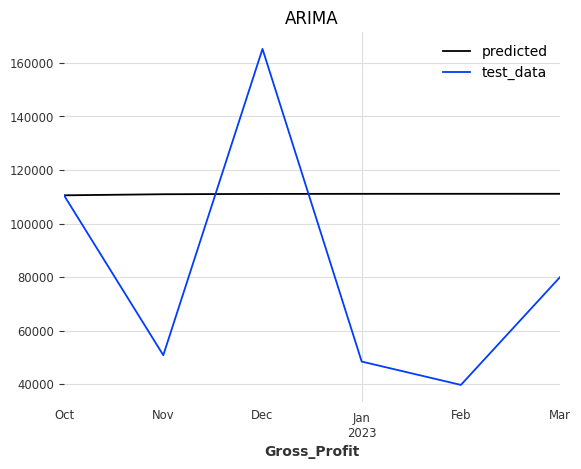

In [429]:
# train_data['GROSS_PROFIT_ACT'].plot(label= 'train_data')
forecast.plot(label= 'predicted')
test_data['GROSS_PROFIT_ACT'].plot(label= 'test_data')
plt.legend()
plt.xlabel('Gross_Profit')
plt.title('ARIMA')

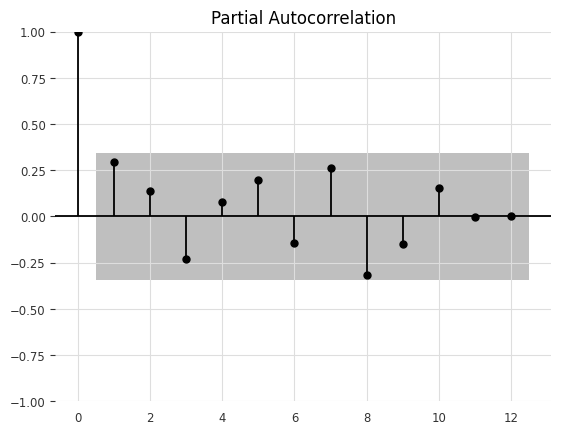

In [299]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(train_data['GROSS_PROFIT_ACT'], lags= 12);

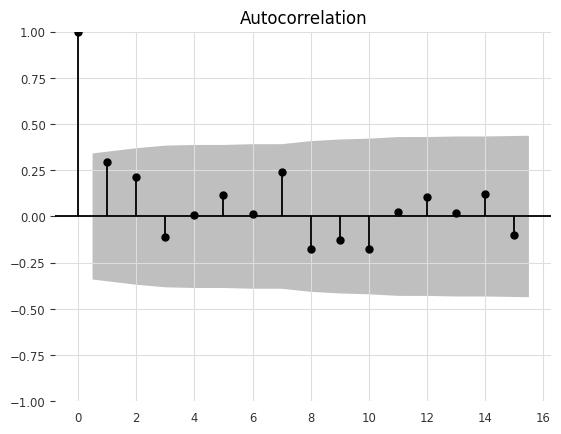

In [300]:
plot_acf(train_data['GROSS_PROFIT_ACT'], lags= 15);

## Holt Winter's

In [301]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_holt = ExponentialSmoothing(train_data['GROSS_PROFIT_ACT'], trend= 'mul', seasonal= 'mul').fit()

In [303]:
test_holt = model_holt.forecast(6)
test_holt, test_data['GROSS_PROFIT_ACT']

(2022-10-31    70052.156860
 2022-11-30    86331.141299
 2022-12-31    98538.536397
 2023-01-31    65878.339120
 2023-02-28    76885.560012
 2023-03-31    81769.418224
 Freq: M, dtype: float64,
 DATE
 2022-10-31    110474.504456
 2022-11-30     50850.692112
 2022-12-31    165163.188580
 2023-01-31     48477.757650
 2023-02-28     39760.874780
 2023-03-31     80033.648000
 Name: GROSS_PROFIT_ACT, dtype: float64)

In [304]:
metrics(test_holt, test_data['GROSS_PROFIT_ACT'])

{'MSE': 1502618020.896848,
 'RMSE': 38763.617231843156,
 'MAPE': 40.53928375140357}

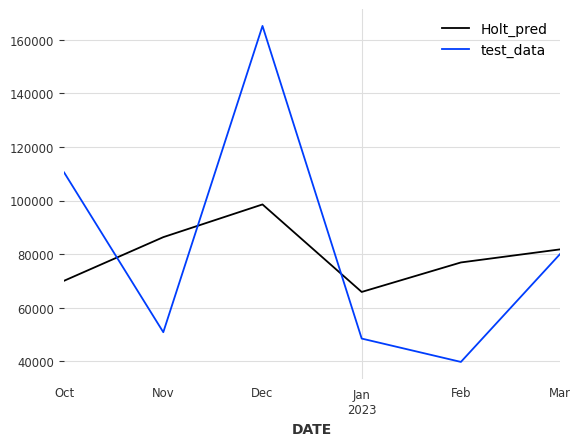

In [305]:
test_holt.plot(label = 'Holt_pred')
test_data['GROSS_PROFIT_ACT'].plot(label= 'test_data')
plt.legend()

## Linear regression

In [446]:
data_df = pd.DataFrame(data_full)

In [449]:
df_linear = data_df.copy()
df_linear.head()


# Differencing the time series

df_linear['lag_1'] = df_linear['GROSS_PROFIT_ACT'].shift(1)
df_linear['lag_2'] = df_linear['GROSS_PROFIT_ACT'].shift(2)
df_linear['lag_3'] = df_linear['GROSS_PROFIT_ACT'].shift(3)
df_linear['lag_4'] = df_linear['GROSS_PROFIT_ACT'].shift(4)
df_linear['lag_5'] = df_linear['GROSS_PROFIT_ACT'].shift(5)
df_linear['lag_6'] = df_linear['GROSS_PROFIT_ACT'].shift(6)
df_linear['lag_7'] = df_linear['GROSS_PROFIT_ACT'].shift(7)
df_linear['lag_8'] = df_linear['GROSS_PROFIT_ACT'].shift(8)
df_linear['lag_9'] = df_linear['GROSS_PROFIT_ACT'].shift(9)
df_linear['lag_10'] = df_linear['GROSS_PROFIT_ACT'].shift(10)
df_linear['lag_11'] = df_linear['GROSS_PROFIT_ACT'].shift(11)
df_linear['lag_12'] = df_linear['GROSS_PROFIT_ACT'].shift(12)
df_linear['lag_13'] = df_linear['GROSS_PROFIT_ACT'].shift(13)
print(len(df_linear))

39


In [448]:
df_linear = df_linear.dropna()

df_linear = df_linear[['GROSS_PROFIT_ACT', 'lag_1', 'lag_2', 'lag_3', 
                       'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13']]

df_linear, len(df_linear)

(            GROSS_PROFIT_ACT          lag_1          lag_2          lag_3  \
 DATE                                                                        
 2021-02-28      96537.839956   82553.123409  123438.285702  109664.181550   
 2021-03-31     103175.381942   96537.839956   82553.123409  123438.285702   
 2021-04-30     156848.342745  103175.381942   96537.839956   82553.123409   
 2021-05-31      93364.205725  156848.342745  103175.381942   96537.839956   
 2021-06-30     116064.331867   93364.205725  156848.342745  103175.381942   
 2021-07-31     132255.290315  116064.331867   93364.205725  156848.342745   
 2021-08-31     156037.898654  132255.290315  116064.331867   93364.205725   
 2021-09-30     146354.684503  156037.898654  132255.290315  116064.331867   
 2021-10-31     125984.276187  146354.684503  156037.898654  132255.290315   
 2021-11-30     126949.937985  125984.276187  146354.684503  156037.898654   
 2021-12-31      32417.895477  126949.937985  125984.276187  146

In [451]:
X = df_linear.drop(columns= ['GROSS_PROFIT_ACT'], axis=1)
y = df_linear['GROSS_PROFIT_ACT']

In [452]:
len(X)

39

In [453]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = X[:-6], X[-6:], y[:-6], y[-6:]

In [454]:
from sklearn.linear_model import LinearRegression
model_linear= LinearRegression()

model_linear.fit(X_train_lin, y_train_lin)
pred_lin = model_linear.predict(X_test_lin)
pred_lin

ValueError: could not convert string to float: 'Jan'

In [455]:
y_test_lin

DATE
2022-10-31    110474.504456
2022-11-30     50850.692112
2022-12-31    165163.188580
2023-01-31     48477.757650
2023-02-28     39760.874780
2023-03-31     80033.648000
Name: GROSS_PROFIT_ACT, dtype: float64

In [456]:
pred_lin = pd.DataFrame(pred_lin, index= y_test_lin.index)
df_linear = pd.concat([y_test_lin, pred_lin], axis=1)
df_linear.head()

,GROSS_PROFIT_ACT,0
DATE,,
2022-10-31,110474.504456,163066.066420
2022-11-30,50850.692112,76362.103132
2022-12-31,165163.188580,-120655.979123
2023-01-31,48477.757650,-143257.990089
2023-02-28,39760.874780,-21202.922958


In [457]:
df_linear.columns = ['actual', 'prediction']
df_linear

,actual,prediction
DATE,,
2022-10-31,110474.504456,163066.066420
2022-11-30,50850.692112,76362.103132
2022-12-31,165163.188580,-120655.979123
2023-01-31,48477.757650,-143257.990089
2023-02-28,39760.874780,-21202.922958
2023-03-31,80033.648000,126326.759599


Text(0.5, 1.0, 'Linear Regression')

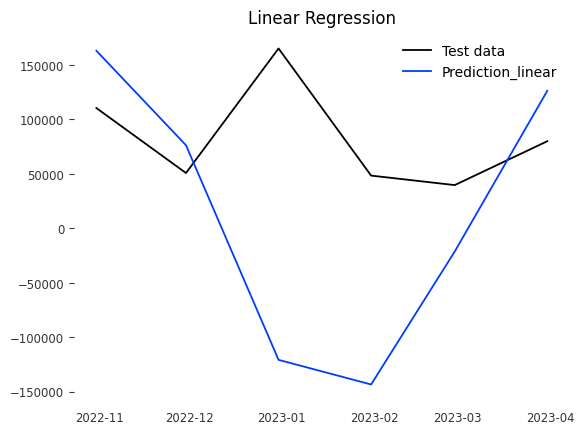

In [458]:
plt.plot(df_linear['actual'], label = 'Test data')
plt.plot(df_linear['prediction'], label = 'Prediction_linear')
plt.legend()
plt.grid()
plt.title('Linear Regression')

In [207]:
type(df_linear['actual'])

pandas.core.series.Series

In [322]:
metrics(df_linear['actual'], df_linear['prediction'])

{'MSE': 3655574965.82546, 'RMSE': 60461.35100893347, 'MAPE': 94.97745069186273}

## N-Beats

In [324]:
import darts
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape as mape_darts, r2_score
from darts.datasets import AirPassengersDataset

In [325]:
AirPassengersDataset().load()

<TimeSeries (DataArray) (Month: 144, component: 1, sample: 1)>
array([[[112.]],

       [[118.]],

       [[132.]],

       [[129.]],

       [[121.]],

       [[135.]],

       [[148.]],

       [[148.]],

       [[136.]],

       [[119.]],

...

       [[419.]],

       [[461.]],

       [[472.]],

       [[535.]],

       [[622.]],

       [[606.]],

       [[508.]],

       [[461.]],

       [[390.]],

       [[432.]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1960-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [326]:
len(AirPassengersDataset().load().pd_dataframe())

144

In [327]:
data_nbeats = data_full.copy()
data_nbeats = pd.DataFrame(data_nbeats)
data_nbeats = data_nbeats.reset_index()

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(data_nbeats, 'DATE', 'GROSS_PROFIT_ACT', freq='M')
series

<TimeSeries (DataArray) (DATE: 39, component: 1, sample: 1)>
array([[[109303.40936824]],

       [[118826.55589498]],

       [[107653.04974318]],

       [[131383.66955095]],

       [[166532.4148249 ]],

       [[107753.21313781]],

       [[162880.2920271 ]],

       [[143148.731489  ]],

       [[168576.04407469]],

       [[ 89683.92449461]],

...

       [[ 60016.6902948 ]],

       [[  3033.38509278]],

       [[112756.93819966]],

       [[109089.21292985]],

       [[110474.50445557]],

       [[ 50850.69211219]],

       [[165163.18857961]],

       [[ 48477.75765   ]],

       [[ 39760.87478   ]],

       [[ 80033.648     ]]])
Coordinates:
  * DATE       (DATE) datetime64[ns] 2020-01-31 2020-02-29 ... 2023-03-31
  * component  (component) object 'GROSS_PROFIT_ACT'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [328]:
series.pd_dataframe()

component,GROSS_PROFIT_ACT
DATE,
2020-01-31,109303.409368
2020-02-29,118826.555895
2020-03-31,107653.049743
2020-04-30,131383.669551
2020-05-31,166532.414825
2020-06-30,107753.213138
2020-07-31,162880.292027
2020-08-31,143148.731489
2020-09-30,168576.044075


In [329]:
print(len(series))
train, val = series.split_after(pd.Timestamp("20220930"))
print(len(train))
print(len(val))

39
33
6


In [330]:
model_nbeats = NBEATSModel(
    input_chunk_length= 14,
    output_chunk_length=1,
    generic_architecture=True,
    num_stacks=5,
    num_blocks=5,
    num_layers=5,
    layer_widths=100,
    n_epochs=20,
    batch_size=2,
    model_name="nbeats_run",
)

model_nbeats.fit(series= train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.1 M 
---------------------------------------------------
1.1 M     Trainable params
589       Non-trainable params
1.1 M     Total params
4.300     Total estimated model params size (MB)


Epoch 0:   0%|          | 0/10 [00:00<?, ?it/s] 

Epoch 19: 100%|██████████| 10/10 [00:00<00:00, 18.39it/s, train_loss=1.71e+7]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 10/10 [00:00<00:00, 18.36it/s, train_loss=1.71e+7]


NBEATSModel(generic_architecture=True, num_stacks=5, num_blocks=5, num_layers=5, layer_widths=100, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=14, output_chunk_length=1, n_epochs=20, batch_size=2, model_name=nbeats_run)

In [331]:
ts_tpred = model_nbeats.predict(n= 6,  
	                            # past_covariates=cov_t,
	                        num_samples= 1,   
	                        n_jobs= -1, 
	                        verbose=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

Predicting DataLoader 0: 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]


In [332]:
ts_tpred.pd_dataframe()

component,GROSS_PROFIT_ACT
DATE,
2022-10-31,143453.211411
2022-11-30,108823.193590
2022-12-31,11369.409169
2023-01-31,26909.082166
2023-02-28,12688.361009
2023-03-31,108698.096735


In [333]:
val.pd_dataframe()

component,GROSS_PROFIT_ACT
DATE,
2022-10-31,110474.504456
2022-11-30,50850.692112
2022-12-31,165163.188580
2023-01-31,48477.757650
2023-02-28,39760.874780
2023-03-31,80033.648000


In [425]:
nbeats_pred = pd.DataFrame(ts_tpred.pd_dataframe())
nbeats_pred.rename(columns= {'GROSS_PROFIT_ACT': 'nbeats_pred'}, inplace= True)

In [426]:
df_nbeats = pd.concat([val.pd_dataframe(), nbeats_pred], axis=1)
df_nbeats

component,GROSS_PROFIT_ACT,nbeats_pred
DATE,,
2022-10-31,110474.504456,143453.211411
2022-11-30,50850.692112,108823.193590
2022-12-31,165163.188580,11369.409169
2023-01-31,48477.757650,26909.082166
2023-02-28,39760.874780,12688.361009
2023-03-31,80033.648000,108698.096735


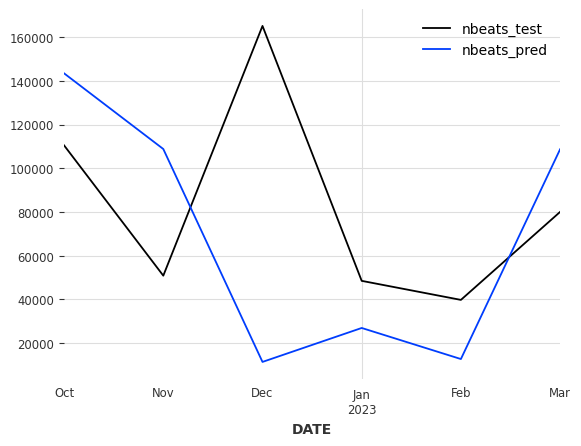

In [427]:
df_nbeats['GROSS_PROFIT_ACT'].plot(label= 'nbeats_test')
df_nbeats['nbeats_pred'].plot(label= 'nbeats_pred')
# pd.DataFrame(train_nbeats_new.pd_dataframe()).plot(label= 'train_data_new')
plt.legend()

## Pakshal data

In [334]:
new_path = r'C:\Users\himanshu.verma\vs_code\POC_MGC\Dataset\pakshal_data_americana.csv'

df_new = pd.read_csv(new_path)
df_new.head()

,Unnamed: 0,DATE,CODE,GROSS_PROFIT_ACT,ID
0,0,2020-01-01,ID1,109303.409368,Egypt_Protein_Beefy_Retail_Grocery/Retail
1,1,2020-02-01,ID1,118826.555895,Egypt_Protein_Beefy_Retail_Grocery/Retail
2,2,2020-03-01,ID1,107653.049743,Egypt_Protein_Beefy_Retail_Grocery/Retail
3,3,2020-04-01,ID1,131383.669551,Egypt_Protein_Beefy_Retail_Grocery/Retail
4,4,2020-05-01,ID1,166532.414825,Egypt_Protein_Beefy_Retail_Grocery/Retail


In [335]:
df_new = df_new[df_new['CODE'] == 'ID1'][['DATE', 'GROSS_PROFIT_ACT']]

In [336]:
df_new = df_new.set_index(['DATE'])

<Axes: xlabel='DATE'>

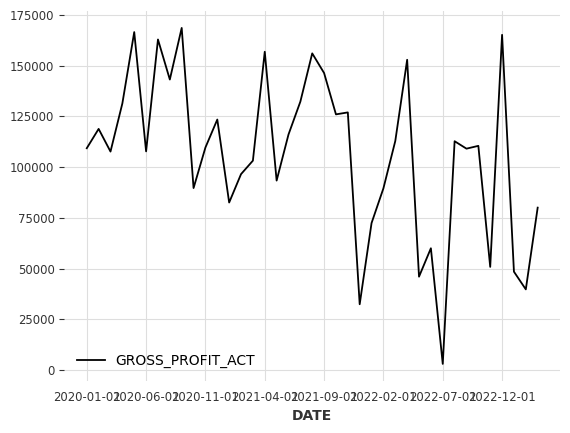

In [337]:
df_new.plot()

In [338]:
adf_test(df_new['GROSS_PROFIT_ACT'])

(-4.801763607182026, 5.3965022200218195e-05, 0, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 678.2951780896855)
ADF Statistic: -4.801763607182026
p-value: 5.3965022200218195e-05
Lags Used: 0
Number of Observations: 38
Critical Values:
   1%: -3.6155091011809297
   5%: -2.941262357486514
   10%: -2.6091995013850418
The time series is likely stationary.


In [339]:
model_autoarima = auto_arima(df_new['GROSS_PROFIT_ACT'], seasonal=True, stepwise=True, suppress_warnings=True, max_order=None)

# Get the best orders
p, d, q = model_autoarima.order
print(f'Best ARIMA Order: ({p}, {d}, {q})')

Best ARIMA Order: (0, 1, 1)


In [340]:
train_new = df_new[:-6]
test_new = df_new[-6:]

## ARIMA

In [342]:
model_arima_new = ARIMA(train_new, order=(0, 1, 1))
results_arima_new = model_arima_new.fit()

# Make forecasts using the fitted ARIMA model
forecast_new = results_arima_new.forecast(steps=6)

In [343]:
forecast_new

2022-10-01    87448.420913
2022-11-01    87448.420913
2022-12-01    87448.420913
2023-01-01    87448.420913
2023-02-01    87448.420913
2023-03-01    87448.420913
Freq: MS, Name: predicted_mean, dtype: float64

In [344]:
test_new

,GROSS_PROFIT_ACT
DATE,
2022-10-01,110474.504456
2022-11-01,50850.692112
2022-12-01,165163.188580
2023-01-01,48477.757650
2023-02-01,39760.874780
2023-03-01,80033.648000


In [423]:
forecast_new.index= test_new.index

df_arima_new_pred = pd.DataFrame(forecast_new)
df_arima_test_new = pd.DataFrame(test_new)

df_arima_new_data = pd.concat([df_arima_test_new, df_arima_new_pred], axis= 1)
df_arima_new_data

,GROSS_PROFIT_ACT,predicted_mean
DATE,,
2022-10-01,110474.504456,87448.420913
2022-11-01,50850.692112,87448.420913
2022-12-01,165163.188580,87448.420913
2023-01-01,48477.757650,87448.420913
2023-02-01,39760.874780,87448.420913
2023-03-01,80033.648000,87448.420913


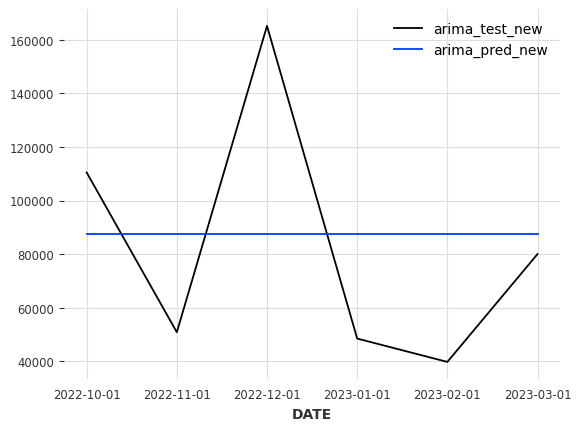

In [424]:
df_arima_new_data['GROSS_PROFIT_ACT'].plot(label= 'arima_test_new')
df_arima_new_data['predicted_mean'].plot(label= 'arima_pred_new')
plt.legend()

In [345]:
metrics(test_new, forecast_new)

{'MSE': 1959495483.145094,
 'RMSE': 44266.18893856906,
 'MAPE': 58.242724664788526}

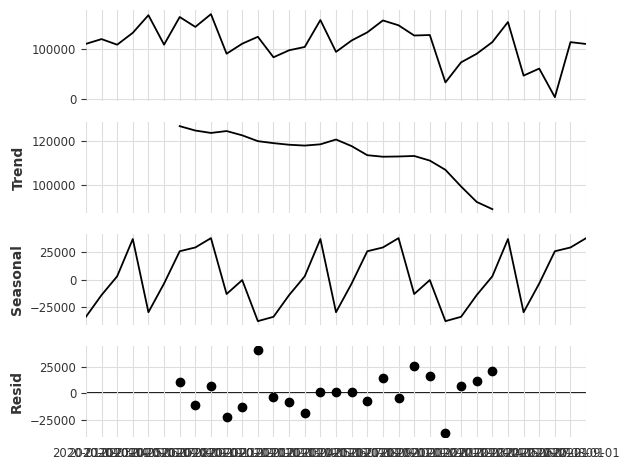

In [346]:
seasonal_decompose(train_new, model= 'additive', period=12).plot();

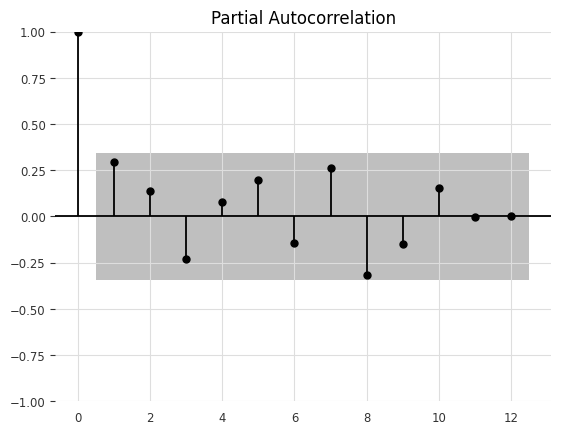

In [347]:
plot_pacf(train_new, lags= 12);

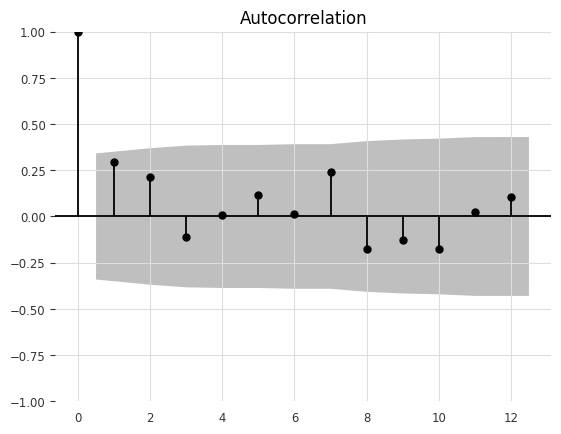

In [348]:
plot_acf(train_new, lags= 12);

## SARIMAX

In [351]:
model_sarima = sm.tsa.SARIMAX(train_new, order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
results_sarima = model_sarima.fit()

# Step 7: Model evaluation
forecast_sarima = results_sarima.get_forecast(steps=6)
forecast_mean = forecast_sarima.predicted_mean
forecast_ci = forecast_sarima.conf_int()


In [419]:
forecast_mean.index= test_new.index

In [420]:
forecast_mean= pd.DataFrame(forecast_mean)
test_new= pd.DataFrame(test_new)

df_sarimax = pd.concat([test_new, forecast_mean], axis= 1)
df_sarimax

,GROSS_PROFIT_ACT,predicted_mean
DATE,,
2022-10-01,110474.504456,66451.645777
2022-11-01,50850.692112,71651.499923
2022-12-01,165163.188580,11856.696177
2023-01-01,48477.757650,37915.472168
2023-02-01,39760.874780,53247.878892
2023-03-01,80033.648000,69599.067919


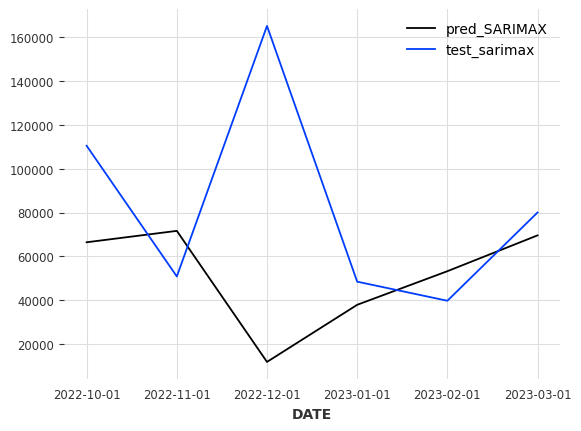

In [421]:
df_sarimax['predicted_mean'].plot(label= 'pred_SARIMAX');
df_sarimax['GROSS_PROFIT_ACT'].plot(label= 'test_sarimax');
plt.legend();

## Holt Winter's

In [355]:
model_holt_new = ExponentialSmoothing(train_new, trend= 'add', seasonal= 'add').fit()

In [356]:
test_holt_new = model_holt_new.forecast(6)
test_holt_new, test_new

(2022-10-01    57856.393514
 2022-11-01    78780.301905
 2022-12-01    94203.727337
 2023-01-01    53216.432525
 2023-02-01    66898.211228
 2023-03-01    72882.788108
 Freq: MS, dtype: float64,
             GROSS_PROFIT_ACT
 DATE                        
 2022-10-01     110474.504456
 2022-11-01      50850.692112
 2022-12-01     165163.188580
 2023-01-01      48477.757650
 2023-02-01      39760.874780
 2023-03-01      80033.648000)

In [357]:
metrics(test_new, test_holt_new)

{'MSE': 1565666451.3929932,
 'RMSE': 39568.50327461216,
 'MAPE': 45.53670103226064}

In [358]:
test_new.columns

Index(['GROSS_PROFIT_ACT'], dtype='object')

In [408]:
test_holt_new = pd.DataFrame(test_holt_new)
test_holt_new.rename(columns= {0: 'pred_holt_new'}, inplace= True)
test_holt_new

,pred_holt_new
DATE,
2022-10-01,57856.393514
2022-11-01,78780.301905
2022-12-01,94203.727337
2023-01-01,53216.432525
2023-02-01,66898.211228
2023-03-01,72882.788108


In [409]:
test_new.columns

Index(['GROSS_PROFIT_ACT'], dtype='object')

In [411]:
# test_holt_new.index = test_new.index
df_holt_new_pred = pd.DataFrame(test_holt_new)
df_test_holt_new = pd.DataFrame(test_new)

df_holt_new=  pd.concat([df_holt_new_pred, df_test_holt_new], axis= 1)
df_holt_new

,pred_holt_new,GROSS_PROFIT_ACT
DATE,,
2022-10-01,57856.393514,110474.504456
2022-11-01,78780.301905,50850.692112
2022-12-01,94203.727337,165163.188580
2023-01-01,53216.432525,48477.757650
2023-02-01,66898.211228,39760.874780
2023-03-01,72882.788108,80033.648000


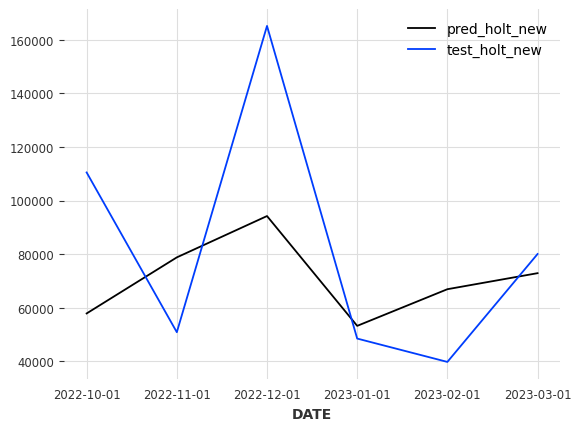

In [415]:
# train_new.plot(label= 'train_new_data')
df_holt_new['pred_holt_new'].plot(label= 'pred_holt_new')
df_holt_new['GROSS_PROFIT_ACT'].plot(label= 'test_holt_new')
plt.legend()

## N-BEATS

In [365]:
df_new

,GROSS_PROFIT_ACT
DATE,
2020-01-01,109303.409368
2020-02-01,118826.555895
2020-03-01,107653.049743
2020-04-01,131383.669551
2020-05-01,166532.414825
2020-06-01,107753.213138
2020-07-01,162880.292027
2020-08-01,143148.731489
2020-09-01,168576.044075


In [366]:
data_nbeats_new = df_new.copy()
data_nbeats_new = pd.DataFrame(data_nbeats_new)
data_nbeats_new = data_nbeats_new.reset_index()

# Create a TimeSeries, specifying the time and value columns
series_new = TimeSeries.from_dataframe(data_nbeats_new, 'DATE', 'GROSS_PROFIT_ACT')
series_new

<TimeSeries (DataArray) (DATE: 39, component: 1, sample: 1)>
array([[[109303.40936824]],

       [[118826.55589498]],

       [[107653.04974318]],

       [[131383.66955095]],

       [[166532.4148249 ]],

       [[107753.21313781]],

       [[162880.2920271 ]],

       [[143148.731489  ]],

       [[168576.04407469]],

       [[ 89683.92449461]],

...

       [[ 60016.6902948 ]],

       [[  3033.38509278]],

       [[112756.93819966]],

       [[109089.21292985]],

       [[110474.50445557]],

       [[ 50850.69211219]],

       [[165163.18857961]],

       [[ 48477.75765   ]],

       [[ 39760.87478   ]],

       [[ 80033.648     ]]])
Coordinates:
  * DATE       (DATE) datetime64[ns] 2020-01-01 2020-02-01 ... 2023-03-01
  * component  (component) object 'GROSS_PROFIT_ACT'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [367]:
data_nbeats_new

,DATE,GROSS_PROFIT_ACT
0,2020-01-01,109303.409368
1,2020-02-01,118826.555895
2,2020-03-01,107653.049743
3,2020-04-01,131383.669551
4,2020-05-01,166532.414825
5,2020-06-01,107753.213138
6,2020-07-01,162880.292027
7,2020-08-01,143148.731489
8,2020-09-01,168576.044075
9,2020-10-01,89683.924495


In [241]:
# data_nbeats_new.to_csv('nbeats_data_pakshal.csv')

In [368]:
print(len(series_new))
train_nbeats_new, val_nbeats_new = series_new.split_after(pd.Timestamp("20220901"))
print(len(train_nbeats_new))
print(len(val_nbeats_new))

39
33
6


In [430]:
model_nbeats_new = NBEATSModel(
    input_chunk_length= 14,
    output_chunk_length=1,
    generic_architecture=True,
    num_stacks=5,
    num_blocks=5,
    num_layers=5,
    layer_widths=100,
    n_epochs=30,
    batch_size=5,
    model_name="nbeats_run",
)

results_nbeats_new= model_nbeats_new.fit(series= train_nbeats_new)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs



  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 1.1 M 
---------------------------------------------------
1.1 M     Trainable params
589       Non-trainable params
1.1 M     Total params
4.300     Total estimated model params size (MB)


Epoch 29: 100%|██████████| 4/4 [00:00<00:00, 15.92it/s, train_loss=1.67e+7]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 4/4 [00:00<00:00, 15.89it/s, train_loss=1.67e+7]


In [431]:
ts_tpred_new = results_nbeats_new.predict(n= 6,  
	                        # past_covariates=cov_t,
	                        num_samples= 1,   
	                        n_jobs= -1, 
	                        verbose=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]

Predicting DataLoader 0: 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


In [380]:
ts_tpred_new.pd_dataframe(), val_nbeats_new.pd_dataframe()

(component   GROSS_PROFIT_ACT
 DATE                        
 2022-10-01     147429.563911
 2022-11-01     108240.503886
 2022-12-01      10652.583713
 2023-01-01      24790.719338
 2023-02-01      14527.468807
 2023-03-01     108314.680440,
 component   GROSS_PROFIT_ACT
 DATE                        
 2022-10-01     110474.504456
 2022-11-01      50850.692112
 2022-12-01     165163.188580
 2023-01-01      48477.757650
 2023-02-01      39760.874780
 2023-03-01      80033.648000)

In [386]:
nbeats_pred_new = pd.DataFrame(ts_tpred_new.pd_dataframe())
nbeats_pred_new.rename(columns= {'GROSS_PROFIT_ACT': 'nbeats_pred_new'}, inplace= True)

In [388]:
df_nbeats_new = pd.concat([val_nbeats_new.pd_dataframe(), nbeats_pred_new], axis=1)
df_nbeats_new

component,GROSS_PROFIT_ACT,nbeats_pred_new
DATE,,
2022-10-01,110474.504456,147429.563911
2022-11-01,50850.692112,108240.503886
2022-12-01,165163.188580,10652.583713
2023-01-01,48477.757650,24790.719338
2023-02-01,39760.874780,14527.468807
2023-03-01,80033.648000,108314.680440


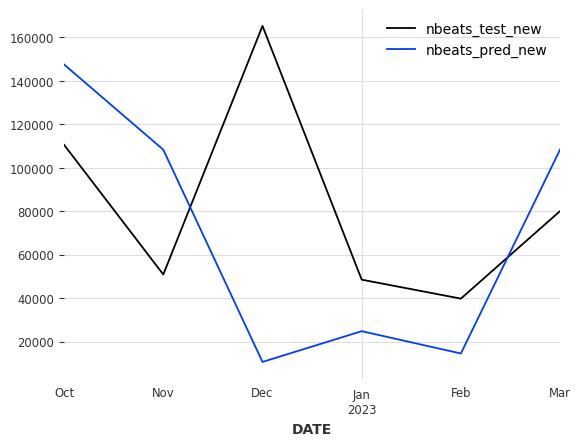

In [400]:
df_nbeats_new['GROSS_PROFIT_ACT'].plot(label= 'nbeats_test_new')
df_nbeats_new['nbeats_pred_new'].plot(label= 'nbeats_pred_new')
# pd.DataFrame(train_nbeats_new.pd_dataframe()).plot(label= 'train_data_new')
plt.legend()

In [398]:
pd.DataFrame(train_nbeats_new.pd_dataframe())

component,GROSS_PROFIT_ACT
DATE,
2020-01-01,109303.409368
2020-02-01,118826.555895
2020-03-01,107653.049743
2020-04-01,131383.669551
2020-05-01,166532.414825
2020-06-01,107753.213138
2020-07-01,162880.292027
2020-08-01,143148.731489
2020-09-01,168576.044075


## ARIMA with window size

In [ ]:
time_series_data = data

window_size = 12
prediction_horizon = 2
step_size = 2

# Initialize an empty list to store the predictions
predictions = []

for i in range(0, len(time_series_data) - (window_size + prediction_horizon), step_size):
    # Extract the current window of 5 values
    window = time_series_data[i:i + window_size]

    # Extract the target values (next 2 values to predict)
    targets = time_series_data[i + window_size:i + window_size + prediction_horizon]

    # Create a simple model (e.g., Linear Regression)
    model = ARIMA(data, order=(p, d, q))

    # Train the model on the current window
    model.fit(np.arange(len(window)).reshape(-1, 1), window)

    # Make predictions for the target values
    predictions.extend(model.predict(np.arange(len(window), len(window) + prediction_horizon).reshape(-1, 1)))

print("Predictions:", predictions)
